In [1]:
# load Python packages
import numpy as np  # for numerical python libraries
import matplotlib.pyplot as plt  # for plotting
import scipy.stats as stats

In [2]:
def sim_jump_process_w_drift(X0, c, lam, shape, scale, T, Ndt, Nsims=100):
    # create time increment
    dt = T / Ndt
    
    # set the different times as a vector
    time = np.linspace(0, T, Ndt+1)
    
    # initialize matrix 
    X = np.zeros((Ndt+1,Nsims))
    
    # initial value of the process
    X[0,:] = X0
    
    # recursively simulate the processes
    for idx in range(Ndt):
        U = stats.uniform.rvs(size=Nsims)
        jump = U < (1 - np.exp(-lam * dt))  # interarrival times exponentially dist
        jump_size = stats.gamma.rvs(a=shape, scale=scale, size=Nsims)
        
        X[idx+1,:] = X[idx,:] + c * dt - jump * jump_size
    
    return time, X

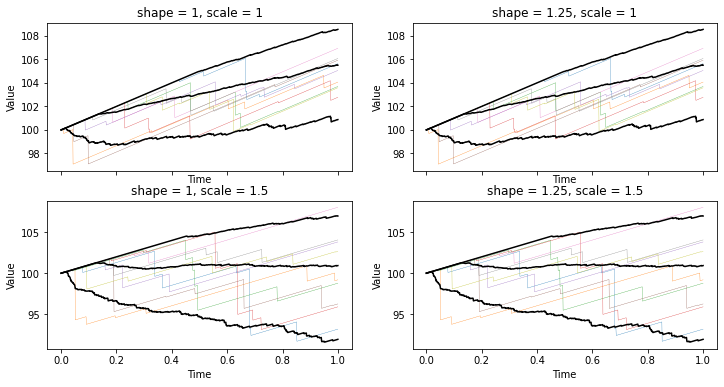

In [3]:
# initialize different parameters for the GBM
X0 = 100
c = 10
lam = 5
shape = [1,1.25]
scale = [1,1.5]
T = 1
Ndt = 1000
Nsims = 500

fig, axes = plt.subplots(2, 2, figsize=(12,6), sharex=True)
for idx_row, row in enumerate(axes):
    for idx_col, col in enumerate(row):
        np.random.seed(460)
        t, price = sim_jump_process_w_drift(X0, c, lam, shape[idx_row],
                                            scale[idx_row], T, Ndt, Nsims)
        
        # plot the sample paths
        col.plot(t, price[:,1:10], linewidth=0.3)
        col.plot(t, np.quantile(price, [0.1, 0.5, 0.9], axis=1).transpose(), 
                  linewidth=1.5, color='black')
        col.set_title(r"shape = " + str(shape[idx_col]) + r", scale = " + str(scale[idx_row]))
        col.set_xlabel('Time')
        col.set_ylabel('Value')
plt.show()